In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.warn('ignore')
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: ignore
  from ipykernel import kernelapp as app


In [4]:
data = pd.read_csv(r'data_stocks.csv')
df = data.copy()
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


DATA ANALYSIS

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
DATE,41266.0,1.497749e+09,3.822211e+06,1.491226e+09,1.494432e+09,1.497638e+09,1.501090e+09,1.504210e+09
SP500,41266.0,2.421538e+03,3.955713e+01,2.329140e+03,2.390860e+03,2.430150e+03,2.448820e+03,2.490650e+03
NASDAQ.AAL,41266.0,4.770835e+01,3.259377e+00,4.083000e+01,4.494540e+01,4.836000e+01,5.018000e+01,5.447500e+01
NASDAQ.AAPL,41266.0,1.504536e+02,6.236826e+00,1.401600e+02,1.446400e+02,1.499450e+02,1.550650e+02,1.645100e+02
NASDAQ.ADBE,41266.0,1.413179e+02,6.916740e+00,1.282400e+02,1.351950e+02,1.422600e+02,1.471000e+02,1.553300e+02
...,...,...,...,...,...,...,...,...
NYSE.XRX,41266.0,1.930072e+01,1.168653e+01,6.660000e+00,7.045000e+00,2.789000e+01,3.047000e+01,3.293000e+01
NYSE.XYL,41266.0,5.454199e+01,3.526321e+00,4.882000e+01,5.163000e+01,5.385000e+01,5.714000e+01,6.213000e+01
NYSE.YUM,41266.0,7.175789e+01,4.038272e+00,6.318000e+01,6.911000e+01,7.347000e+01,7.475000e+01,7.712000e+01
NYSE.ZBH,41266.0,1.214235e+02,5.607070e+00,1.101200e+02,1.175800e+02,1.206500e+02,1.260000e+02,1.334500e+02


In [6]:
data.info(), data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


(None, (41266, 502))

In [7]:
data.isnull().sum()

DATE           0
SP500          0
NASDAQ.AAL     0
NASDAQ.AAPL    0
NASDAQ.ADBE    0
              ..
NYSE.XRX       0
NYSE.XYL       0
NYSE.YUM       0
NYSE.ZBH       0
NYSE.ZTS       0
Length: 502, dtype: int64

FEATURES ENGINEERING & SELECTION

In [42]:
"""Data preprocessing - FEATURES SCALING"""
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
features = data.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

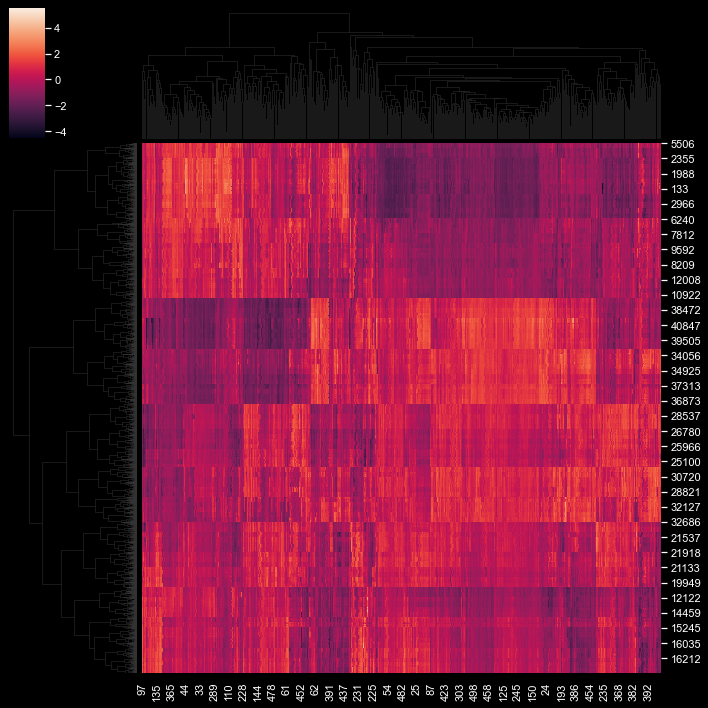

In [44]:
sns.clustermap(X_scaled)

In [63]:
"""Elbow  Analysis"""
cluster_range = range(1, 20)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(X_scaled)
    cluster_errors.append(clusters.inertia_)

In [64]:
#clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors })

clusters_data = pd.DataFrame({" num_clusters": cluster_range, "cluster_errors": cluster_errors})

In [65]:
#clusters_df[0:10]

clusters_data[0:10]

,num_clusters,cluster_errors
0,1,2.075680e+07
1,2,1.291107e+07
2,3,9.150935e+06
3,4,6.974894e+06
4,5,5.535602e+06
5,6,4.723576e+06
6,7,4.027923e+06
7,8,3.583023e+06
8,9,3.195914e+06
9,10,2.935292e+06


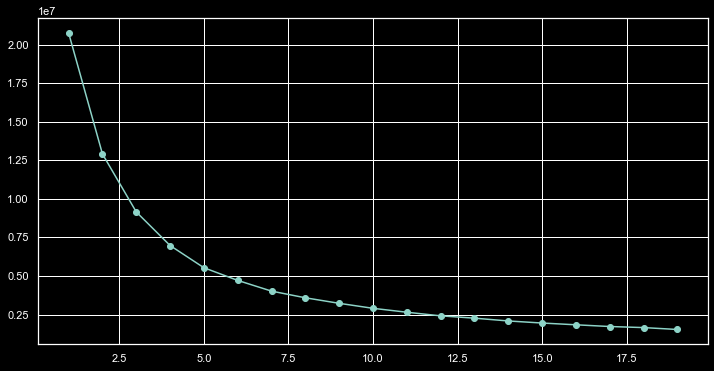

In [56]:
sns.set()
plt.style.use('dark_background')
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")

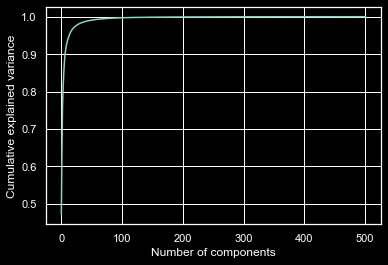

In [9]:
"""Determining optimal number of components for PCA"""
sns.set()
plt.style.use('dark_background')
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [10]:
"""Reducing the number of dimension to 2 to improve our visualization.
                         PCA for dimensionality reduction and visualization"""

pca = PCA(n_components=2)
pca.fit(X_scaled)
print('¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤')
print('✔ 1- Explained variance :')
print(pca.explained_variance_)
print('¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤')

print('¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤')
print('✔ 2- PCA Components :')
print(pca.components_)
print('¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤')
X_transformed = pca.transform(X_scaled)

print('¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤')
print('✔ 3- Transform Feature values first five rows :')
print(X_transformed[:5,:])
print('¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤')

print('¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤')
print('✔ 4- Transformed Feature shape :')
print(X_transformed.shape)
print('¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤')

print('¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤')
print('✔ 5- Original Feature shape:')
print(X_scaled.shape)
print('¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤')

print('¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤')
print('✔ 6- Restransformed Feature shape :')
X_retransformed = pca.inverse_transform(X_transformed)
print(X_retransformed.shape)
print('¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤')

print('¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤')
print('✔ 7- Retransformed Feature values first five rows :')
print(X_retransformed[:5,:])
print('¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤')

¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤
✔ 1- Explained variance :
[237.01475857  86.20695296]
¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤
¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤
✔ 2- PCA Components :
[[-0.0641156  -0.06100625 -0.03912755 ... -0.06222908  0.00249839
  -0.05149673]
 [ 0.01345954 -0.01783581 -0.06428133 ... -0.02036739 -0.08124665
  -0.05945237]]
¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤
¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤
✔ 3- Transform Feature values first five rows :
[[25.64715405  9.99154156]
 [25.74447983  9.87809253]
 [25.66169481  9.81134664]
 [25.76412613  9.97993834]
 [25.67551977  9.86346559]]
¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤
¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤

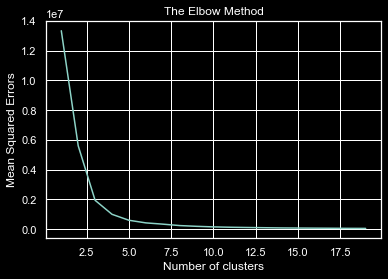

In [11]:
"""Finding the optimum of clusters for KMEANS cluster
                                    from sklearn.cluster import KMeans""" 

dissortions=[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_transformed)
    dissortions.append(kmeans.inertia_)
plt.plot(range(1, 20), dissortions)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Mean Squared Errors')
plt.show()   

<AxesSubplot:title={'center':'Elbow Plot'}, xlabel='Number of clusters', ylabel='Sum of Squared Errors'>

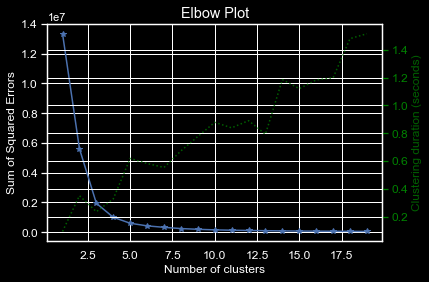

In [13]:
#Let draw Elbow Plot graph
import scikitplot
scikitplot.cluster.plot_elbow_curve(KMeans(),
                                    X_transformed,
                                    cluster_ranges=range(1,20))

In [14]:
"""Applying K-Means Clustering to find stocks which are similar in performance"""
k_means = KMeans(n_clusters=5, init = 'k-means++', random_state = 0)
k_means.fit(X_transformed)
y_kmeans = kmeans.fit_predict(X_transformed)
labels = k_means.labels_
print("Labels Generated:\n",labels) 

Labels Generated:
 [3 3 3 ... 0 0 0]


In [40]:
len(labels)

41266

SIMILAR IN STOCKS PERFORMANCE


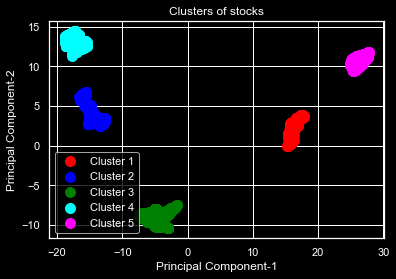

In [16]:
"""Visualising the clusters"""
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 1], s=100, c='red', label = 'Cluster 1')
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 1], s=100, c='blue', label = 'Cluster 2')
plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 1], s=100, c='green', label = 'Cluster 3')
plt.scatter(X_transformed[y_kmeans == 3, 0], X_transformed[y_kmeans == 3, 1], s=100, c='cyan', label = 'Cluster 4')
plt.scatter(X_transformed[y_kmeans == 4, 0], X_transformed[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
print("SIMILAR IN STOCKS PERFORMANCE:")
plt.title('Clusters of stocks')
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.legend()
plt.show()

In [17]:
comp = pd.DataFrame(pca.components_,columns=df.columns)
comp.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.064116,-0.061006,-0.039128,-0.040896,-0.062662,-0.009756,-0.035746,-0.054455,0.050145,-0.035261,...,-0.049236,0.056778,-0.054394,-0.050423,0.046987,-0.057669,-0.061151,-0.062229,0.002498,-0.051497
1,0.013460,-0.017836,-0.064281,0.033885,0.001886,-0.032434,0.043464,-0.029479,0.016120,0.058259,...,-0.058924,0.030252,0.013685,-0.040764,-0.052832,0.010248,0.031474,-0.020367,-0.081247,-0.059452


<AxesSubplot:>

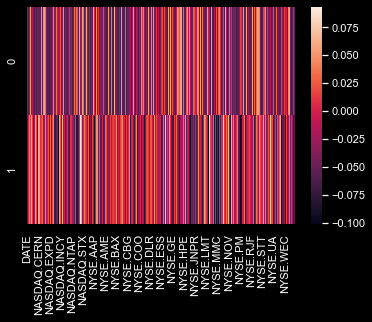

In [18]:
sns.heatmap(comp)

<AxesSubplot:>

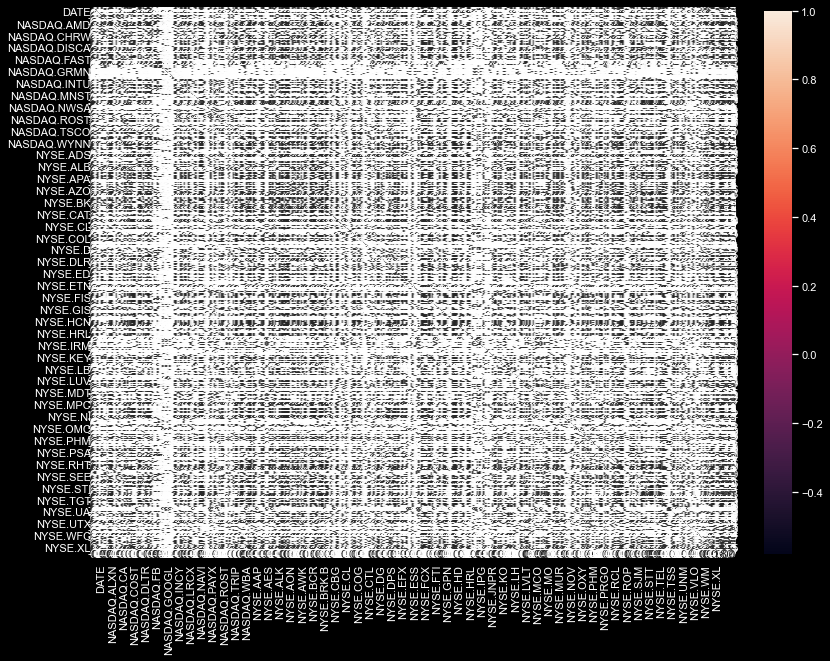

In [38]:
plt.figure(figsize=(14,10))
data_corr = df.corr().abs()
sns.heatmap(data_corr.corr(),annot=True,fmt='.2f',linewidth=0.5)

In [25]:
data['labels'] = labels

In [26]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,labels
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,3
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,3
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,3
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,3
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,3


In [27]:
data['labels'].unique().tolist()

[3, 1, 2, 4, 0]

In [28]:
for i in data['labels'].unique().tolist():
    count = data[data['labels'] == i].shape[0]
    print('\nFor label {} the number of similar stock performances is : {}'.format(i, count))


For label 3 the number of similar stock performances is : 5872

For label 1 the number of similar stock performances is : 8627

For label 2 the number of similar stock performances is : 11164

For label 4 the number of similar stock performances is : 5865

For label 0 the number of similar stock performances is : 9738


In [30]:
"""Fitting Hierachical Clustering to the dataset"""
from sklearn.cluster import SpectralClustering
h_cluster = SpectralClustering(n_clusters=5, affinity='nearest_neighbors')
h_cluster.fit(X_transformed)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
                   coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0,
                   gamma=1.0, kernel_params=None, n_clusters=5,
                   n_components=None, n_init=10, n_jobs=None, n_neighbors=10,
                   random_state=None)

In [31]:
h_cluster.fit_predict(X_transformed)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([2, 2, 2, ..., 1, 1, 1])

In [32]:
y_labels = h_cluster.labels_

In [33]:
len(y_labels), np.unique(y_labels)

(41266, array([0, 1, 2, 3, 4]))

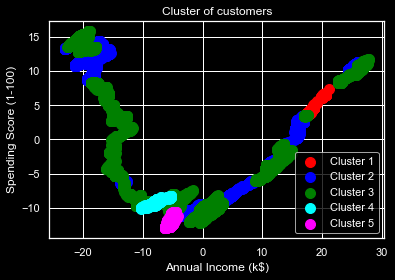

In [35]:
"""Visualising the clusters"""
X = X_transformed
plt.scatter(X[y_labels == 0, 0], X[y_labels == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_labels == 1, 0], X[y_labels == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_labels == 2, 0], X[y_labels == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_labels == 3, 0], X[y_labels == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_labels == 4, 0], X[y_labels == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.title('Cluster of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
df.columns

In [41]:
df1 = df.copy()
df1['labels'] = y_labels
for i in df1['labels'].unique().tolist():
    count = df1[df1['labels'] == i].shape[0]
    print('\nFor label {} the number of similar stock performances is: {}'.format(i,count))


For label 2 the number of similar stock performances is: 25151

For label 1 the number of similar stock performances is: 10874

For label 0 the number of similar stock performances is: 921

For label 4 the number of similar stock performances is: 2551

For label 3 the number of similar stock performances is: 1769


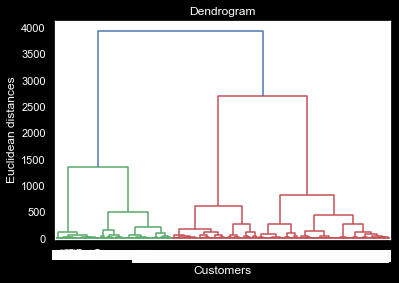

In [47]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X_transformed, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
💾🛺